Dataset Shape: (10841, 13)
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0 

C:\Users\Sanjitha\AppData\Local\Temp\ipykernel_11036\866064192.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


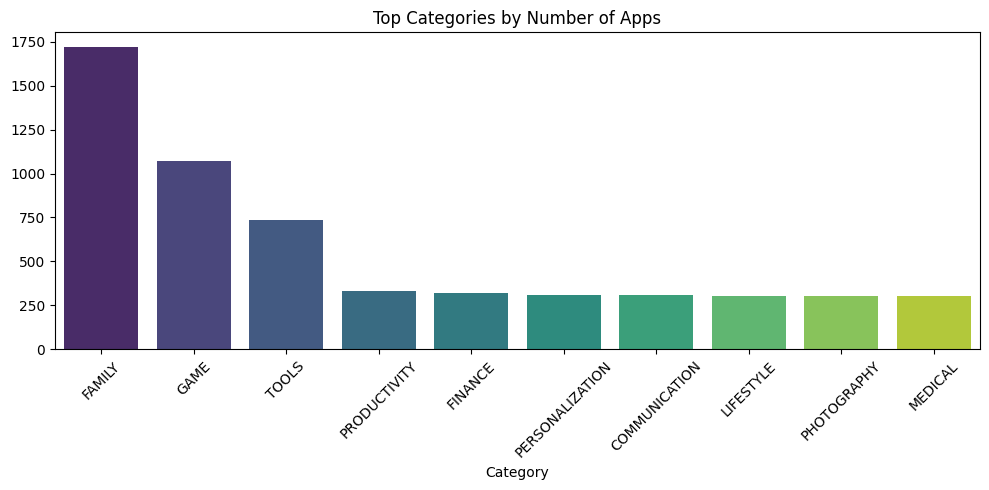

C:\Users\Sanjitha\AppData\Local\Temp\ipykernel_11036\866064192.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="coolwarm")


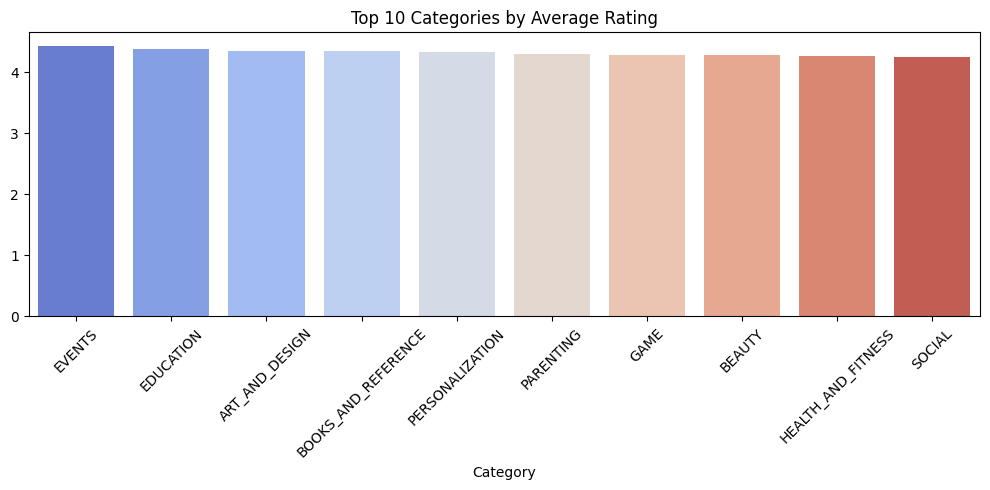

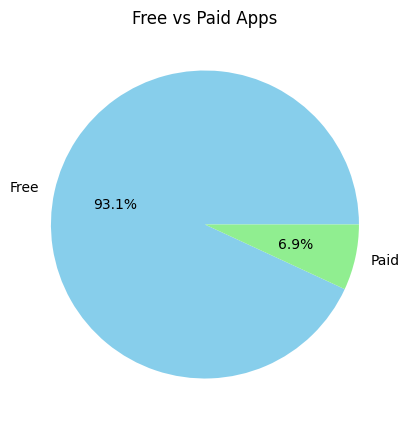

C:\Users\Sanjitha\AppData\Local\Temp\ipykernel_11036\866064192.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue.index, y=revenue.values, palette="magma")


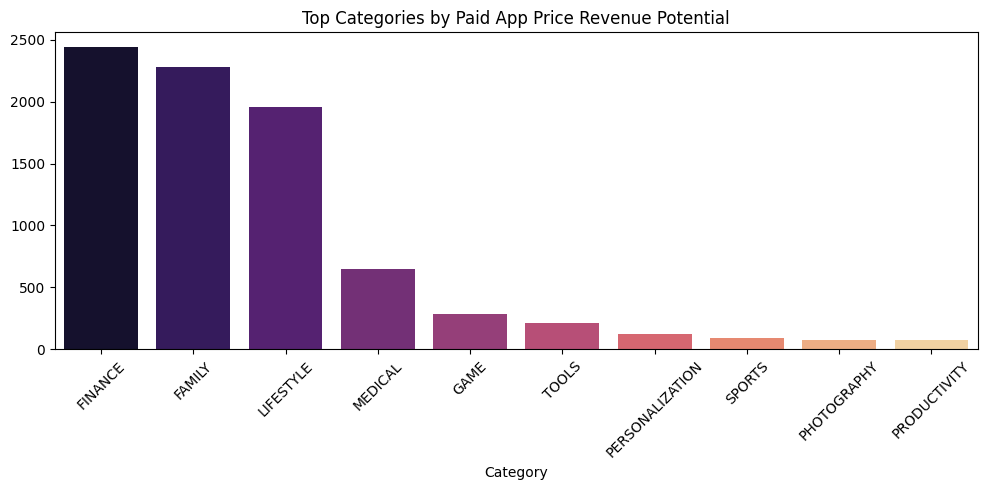

In [3]:
# Google Play Store Apps Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/googleplaystore.csv")

# Quick look
print("Dataset Shape:", df.shape)
print(df.head())

# ----------------------------
# Data Cleaning
# ----------------------------
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing values in important columns
df.dropna(subset=['Category','Rating','Installs','Type','Price'], inplace=True)

# Clean the Installs column
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

# Remove rows with non-numeric values
df = df[df['Installs'].str.isnumeric()]

# Convert to int
df['Installs'] = df['Installs'].astype(int)

# Convert price to float
df['Price'] = df['Price'].str.replace('$','').astype(float)

# ----------------------------
# Analysis
# ----------------------------

# 1. Top Categories by Number of Apps
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top Categories by Number of Apps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("results/top_categories.png")
plt.show()

# 2. Average Rating per Category
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="coolwarm")
plt.title("Top 10 Categories by Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("results/top_ratings.png")
plt.show()

# 3. Free vs Paid Apps Count
plt.figure(figsize=(5,5))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','lightgreen'])
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.savefig("results/free_vs_paid.png")
plt.show()

# 4. Paid Apps Revenue Potential
revenue = df[df['Type']=='Paid'].groupby('Category')['Price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue.index, y=revenue.values, palette="magma")
plt.title("Top Categories by Paid App Price Revenue Potential")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("results/revenue_potential.png")
plt.show()
